# Predicting the pollutant values during the lockdown periods

### Importing important libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### importing the weather and pollutant dataset

In [2]:
dataset = pd.read_csv('./che/df2.csv')
var = 'no2'
dataset = dataset.dropna(subset=[var])

### Formating the date column

In [3]:
dataset = dataset.rename(columns={"Unnamed: 0": "date"})

In [4]:
dataset['date']=pd.to_datetime(dataset['date'].astype(str), format='%Y/%m/%d')

### Training the model

In [5]:
pred = pd.DataFrame()
orig = pd.DataFrame()

In [6]:
df_temp = dataset[dataset['date']<'2020-03-16']

In [7]:
cities = ["Opfikon_Balsberg",
          "StGallen_Blumenbergplatz",
          "StGallen_Stuelegg",
          "Zuerich_Schimmelstrasse",
          "Zuerich_Stampfenbachstrasse"]

for c in cities:
    df=df_temp[df_temp['city']==c]
    
    df = df[['ws','wd','day_year','dew','pca','lagpca_year','lagpca_halfyear',
             'lagpca_12weeks','lagpca_8weeks','lagpca_4weeks','lagpca_2weeks',
             'lagpca_1week','lagws_4weeks','lagws_2weeks','lagws_1week','lagws_4weeks_max',
             'lagws_2weeks_max','lagws_1week_max','year','weekday','month','wx','wy',
             'h_lag1','t_lag1','wx_lag1','wy_lag1','ws_lag1','dew_lag1','h_lag2',
             't_lag2','wx_lag2','wy_lag2','ws_lag2','dew_lag2','h_lag3','t_lag3',
             'wx_lag3','wy_lag3','ws_lag3','dew_lag3',var]]
    
    df = df.dropna()
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    
    from sklearn.ensemble import RandomForestRegressor
    regressor=RandomForestRegressor()
    regressor.fit(X, y)
    
    X_test = dataset[dataset['date']>'2020-03-16']
    X_test = X_test[X_test['date']<'2020-04-25']
    X_test = X_test[X_test['city']==c]
    
    date = X_test['date'].values
    
    y_orig = X_test[var].values

    X_test = X_test[['ws','wd','day_year','dew','pca','lagpca_year','lagpca_halfyear',
             'lagpca_12weeks','lagpca_8weeks','lagpca_4weeks','lagpca_2weeks',
             'lagpca_1week','lagws_4weeks','lagws_2weeks','lagws_1week','lagws_4weeks_max',
             'lagws_2weeks_max','lagws_1week_max','year','weekday','month','wx','wy',
             'h_lag1','t_lag1','wx_lag1','wy_lag1','ws_lag1','dew_lag1','h_lag2',
             't_lag2','wx_lag2','wy_lag2','ws_lag2','dew_lag2','h_lag3','t_lag3',
             'wx_lag3','wy_lag3','ws_lag3','dew_lag3']]



    y_pred = regressor.predict(X_test)
    
    pred[c] = y_pred
    
    orig[c] = y_orig
    
orig['date'] = date
    

### Plotting the predicted and actual values

In [8]:
pred['average'] = pred.mean(axis=1)
orig['average'] = orig.mean(axis=1)

/Users/abhiram/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


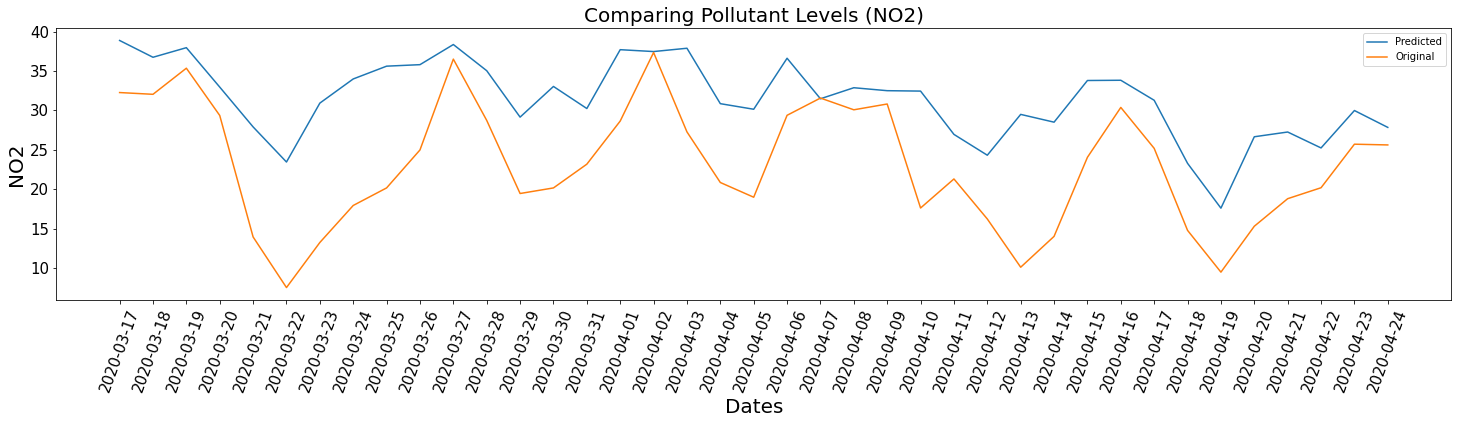

In [9]:


orig = orig.astype({'date': 'str'})

plt.figure(figsize=(25,5))

plt.plot(pred['average'], label = 'Predicted')
plt.plot(orig['average'], label = 'Original')

plt.legend(loc='best')

plt.ylabel(var.upper(),fontsize = 20)
plt.xlabel('Dates',fontsize = 20)
plt.title('Comparing Pollutant Levels ('+var.upper()+')',fontsize = 20)

plt.xticks(range(39),orig['date'].values, fontsize = 15 , rotation = 70)
plt.yticks(fontsize = 15)

plt.savefig('./che/'+var+'_comparision.png', bbox_inches = 'tight')

In [10]:
diff = ((orig['average'] - pred['average'])/ pred['average']) * 100
print("mean percentage difference "+ str(sum(diff)/39))

mean percentage difference -27.943637936705688


In [11]:
orig_low_traffic = orig[['StGallen_Blumenbergplatz', 'Zuerich_Schimmelstrasse', 'Zuerich_Schimmelstrasse']]
pred_low_traffic = pred[['StGallen_Blumenbergplatz', 'Zuerich_Schimmelstrasse', 'Zuerich_Schimmelstrasse']]

pred_low_traffic['average'] = pred_low_traffic.mean(axis=1)
orig_low_traffic['average'] = orig_low_traffic.mean(axis=1)

/Users/abhiram/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/abhiram/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
diff = ((orig_low_traffic['average'] - pred_low_traffic['average'])/pred_low_traffic['average']) * 100
print("low traffic percentage difference "+ str(sum(diff)/39))

low traffic percentage difference -24.25044506634945


In [13]:
diff = ((orig['Opfikon_Balsberg'] - pred['Opfikon_Balsberg'])/pred['Opfikon_Balsberg']) * 100
print("high traffic percentage difference "+ str(sum(diff)/39))

high traffic percentage difference -40.4806947339575


In [14]:
diff = ((orig['StGallen_Stuelegg'] - pred['StGallen_Stuelegg'])/pred['StGallen_Stuelegg']) * 100
print("no traffic percentage difference "+ str(sum(diff)/39))

no traffic percentage difference -7.05962444421197
